In [180]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns',None)

In [181]:
df = pd.read_csv('G:/datasets/housing prices/test.csv')
df_saleprice = pd.read_csv('C:/Users/dell/Desktop/Python/house_prediction/saleprice.csv')

In [182]:
df = pd.concat([df,df_saleprice],axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461.0,20.0,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal,208500
1,1462.0,20.0,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1958.0,1958.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal,181500
2,1463.0,60.0,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal,223500
3,1464.0,60.0,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,1998.0,1998.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,140000
4,1465.0,120.0,RL,43.0,5005.0,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,1992.0,1992.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2916.0,160.0,RM,21.0,1894.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4.0,5.0,1970.0,1970.0,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,TA,6.0,Typ,0.0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0.0,24.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,4.0,2006.0,WD,Abnorml,175000
1456,2917.0,20.0,RL,160.0,20000.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5.0,7.0,1960.0,1996.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,TA,7.0,Typ,1.0,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2006.0,WD,Abnorml,210000
1457,2918.0,85.0,RL,

In [183]:
df = df.iloc[0:1459,:]

# Handling missing values

In [184]:
null_features = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print(len(null_features))
for feature in null_features:
    print("Feature Name is: {} and it contains {}% of missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

23
Feature Name is: MSZoning and it contains 0.0027% of missing values
Feature Name is: LotFrontage and it contains 0.1556% of missing values
Feature Name is: Alley and it contains 0.9267% of missing values
Feature Name is: Utilities and it contains 0.0014% of missing values
Feature Name is: MasVnrType and it contains 0.011% of missing values
Feature Name is: MasVnrArea and it contains 0.0103% of missing values
Feature Name is: BsmtQual and it contains 0.0302% of missing values
Feature Name is: BsmtCond and it contains 0.0308% of missing values
Feature Name is: BsmtExposure and it contains 0.0302% of missing values
Feature Name is: BsmtFinType1 and it contains 0.0288% of missing values
Feature Name is: BsmtFinType2 and it contains 0.0288% of missing values
Feature Name is: BsmtFullBath and it contains 0.0014% of missing values
Feature Name is: BsmtHalfBath and it contains 0.0014% of missing values
Feature Name is: Functional and it contains 0.0014% of missing values
Feature Name is: Fi

# Numerical Features

In [185]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(len(numerical_features))
df[numerical_features]


38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,208500
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,181500
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,223500
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,140000
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,5.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,185000
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1970.0,1.0,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,175000
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,7.0,1.0,1960.0,2.0,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,210000
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,0.0,NaN,0.0,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,266500


# Categorical Feature

In [186]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == "O"]
print(len(categorical_feature))
df[categorical_feature].head(5)

43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [187]:
year_feature = [feature for feature in df.columns if 'Y' in feature or 'Yr' in feature]
print(year_feature)
print(df['YrSold'].unique())
print(df['GarageYrBlt'].unique())

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
[2010. 2009. 2008. 2007. 2006.]
[1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964.   nan 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960. 1963.
 1900. 1957. 1938. 1948. 1962. 1928. 1930. 1926. 1939. 1973. 1942. 1979.
 1923. 1915. 1917. 1940. 1910. 1969. 1968. 1977. 1945. 1987. 1947. 1954.
 1941. 1951. 1896. 1976. 2008. 2007. 1965. 2001. 1972. 1984. 1985. 1996.
 1995. 1980. 1986. 1981. 1982. 1991. 1988. 1953. 1924. 1927. 1946. 1934.
 1983. 1916. 1918. 1937. 1932. 1935. 1925. 1921. 1895. 1922. 2207. 1936.
 1943. 1919.]


Text(0.5, 1.0, 'House price vs YearSold')

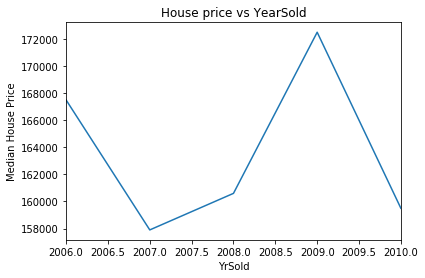

In [188]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('Median House Price')
plt.title('House price vs YearSold')

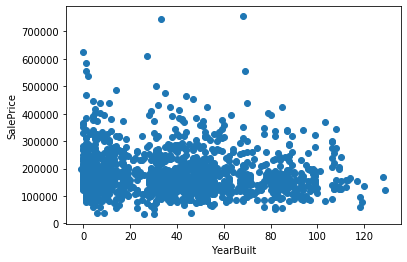

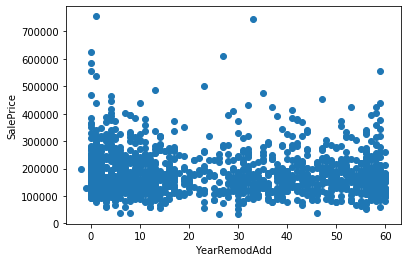

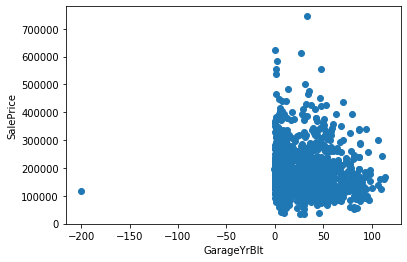

In [189]:
# Since we make observation here that as year goes price of house is less which is not true so 
#plotting graph between saleprice and number of years took that house to do different things

for features in year_feature:
    if features != 'YrSold':
        data1 = df.copy()
        
        data1[features] = data1['YrSold']-data1[features]
        plt.scatter(data1[features],data1['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

In [190]:
# discrete features
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print(len(discrete_feature))
df[discrete_feature]

16


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,20.0,5.0,6.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,0.0,0.0,6.0
1,20.0,6.0,6.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1.0,0.0,0.0,6.0
2,60.0,5.0,5.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,3.0
3,60.0,6.0,6.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,0.0,0.0,6.0
4,120.0,8.0,5.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,4.0,7.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,6.0
1455,160.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1.0,0.0,0.0,4.0
1456,20.0,5.0,7.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,7.0,1.0,2.0,0.0,0.0,9.0
1457,85.0,5.0,5.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,7.0


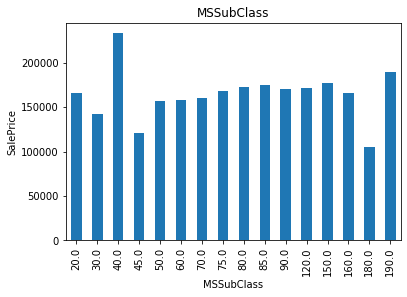

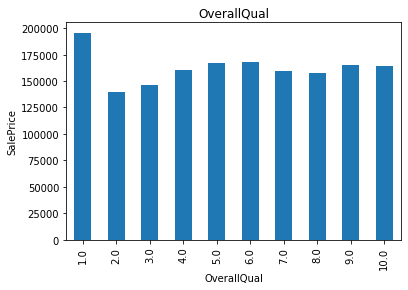

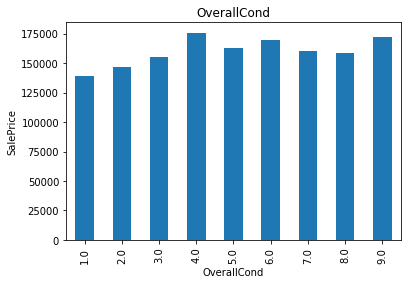

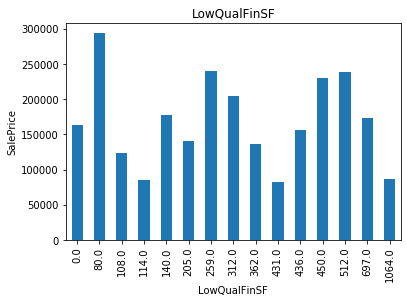

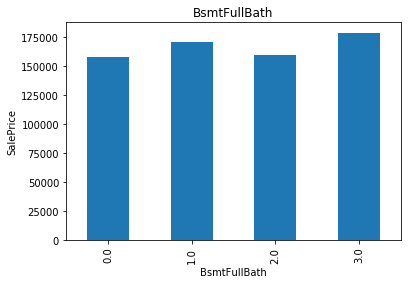

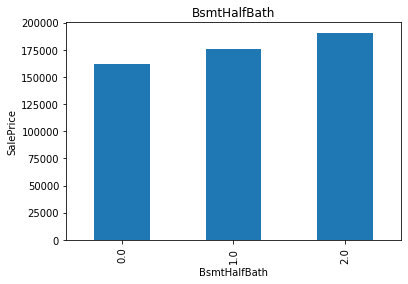

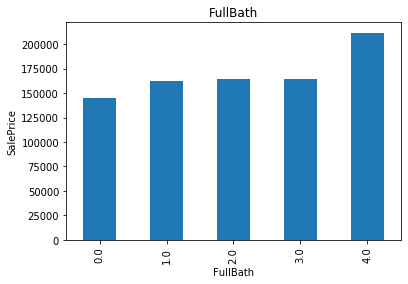

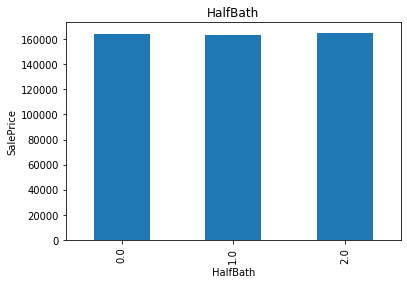

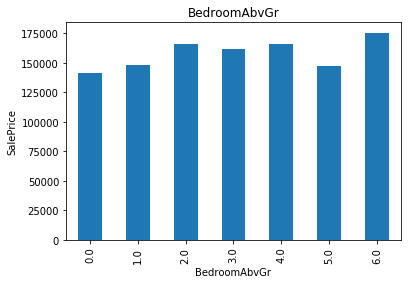

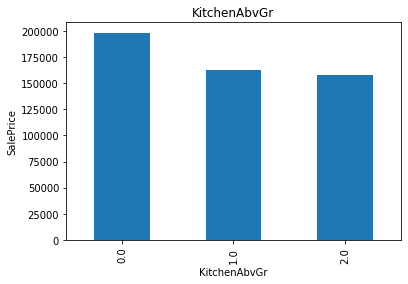

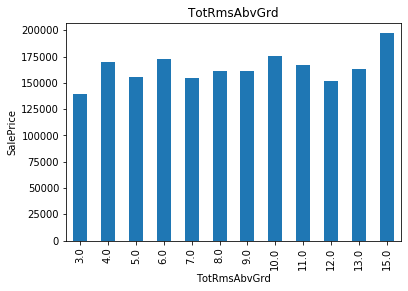

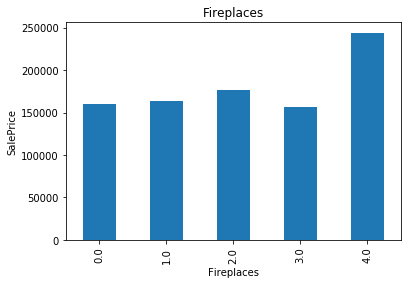

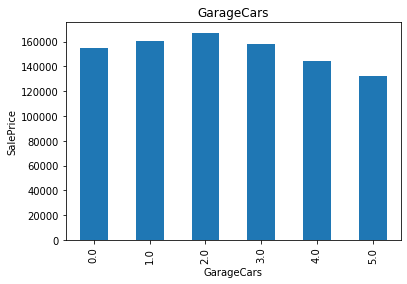

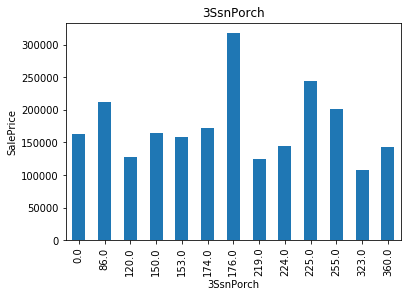

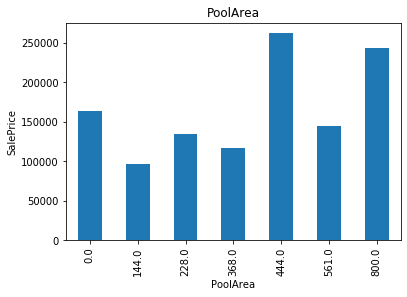

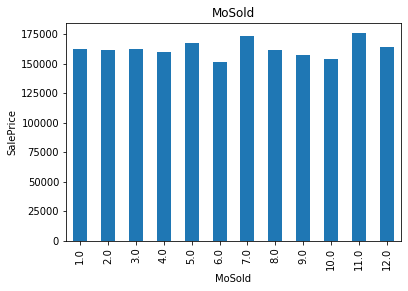

In [191]:
# plotting grapg between numerical features and saleprice to find out more info.
for feature in discrete_feature:
    dataset = df.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [192]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print(len(continous_feature))
print(continous_feature)
df[continous_feature].head()

17
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
0,80.0,11622.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,896.0,730.0,140.0,0.0,0.0,120.0,0.0,208500
1,81.0,14267.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,1329.0,312.0,393.0,36.0,0.0,0.0,12500.0,181500
2,74.0,13830.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,1629.0,482.0,212.0,34.0,0.0,0.0,0.0,223500
3,78.0,9978.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,1604.0,470.0,360.0,36.0,0.0,0.0,0.0,140000
4,43.0,5005.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,1280.0,506.0,0.0,82.0,0.0,144.0,0.0,250000


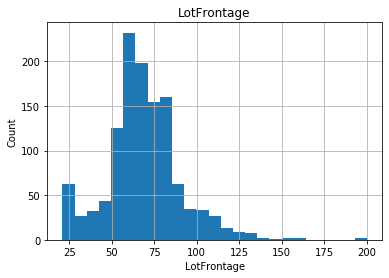

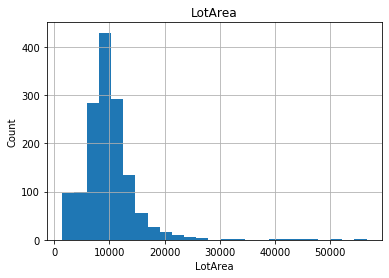

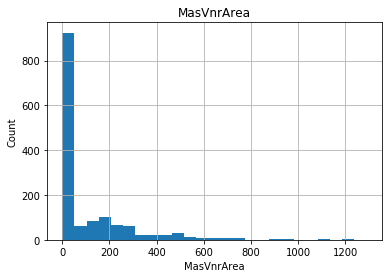

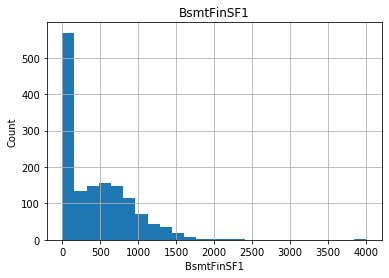

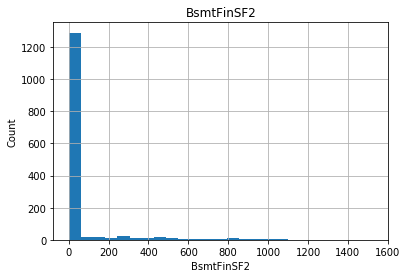

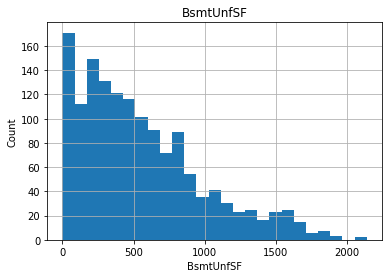

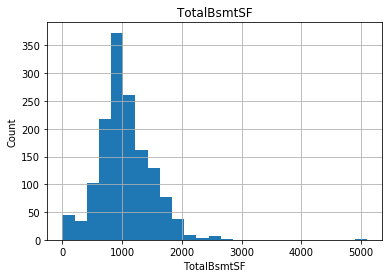

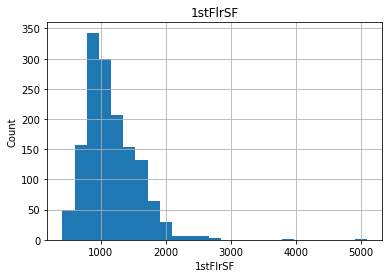

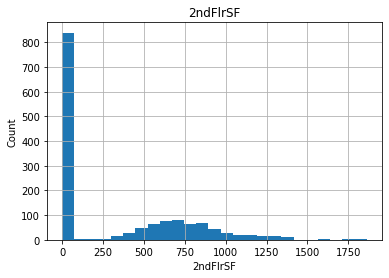

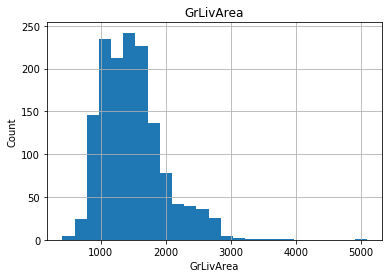

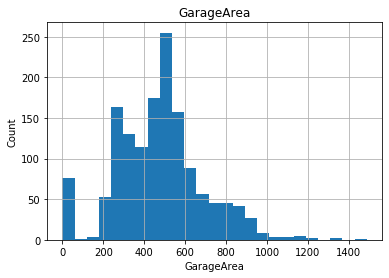

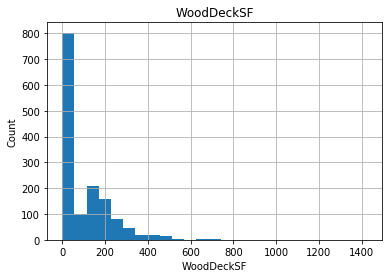

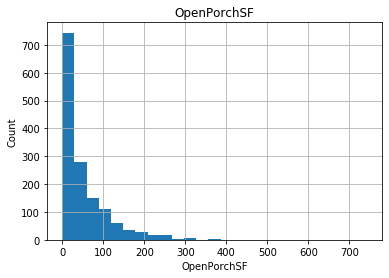

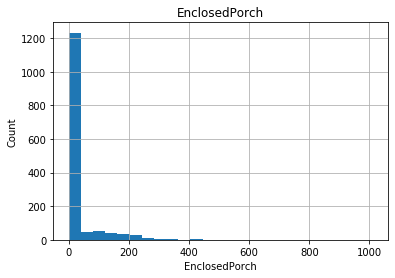

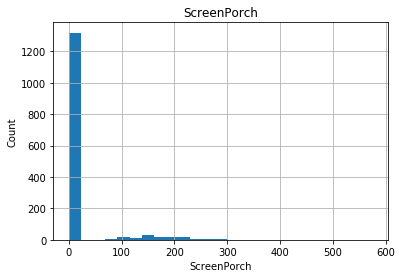

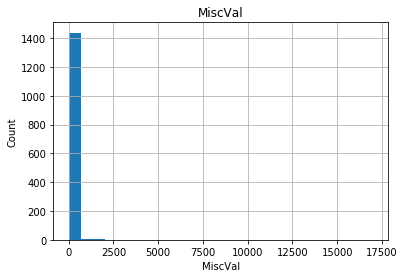

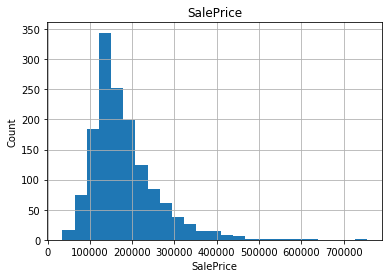

In [193]:
for feature in continous_feature:
    dataset = df.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

LotFrontage


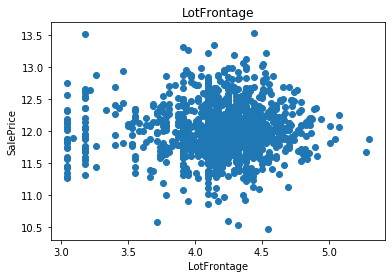

LotArea


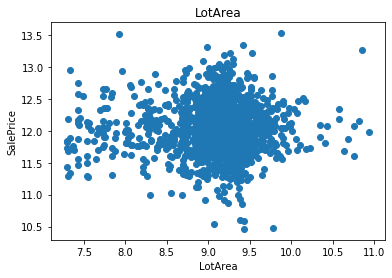

1stFlrSF


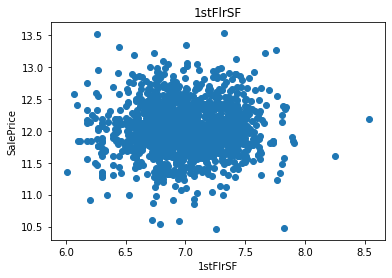

GrLivArea


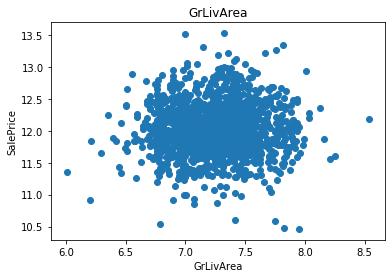

SalePrice


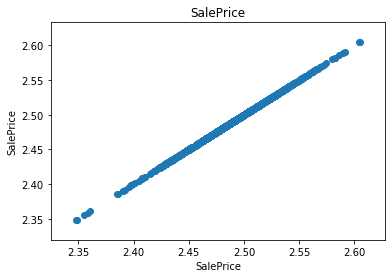

In [194]:
# converting feature into logarithmic transformation

for feature in continous_feature:
    dataset = df.copy()

    if 0 in dataset[feature].unique():
        pass
    else:
        print(feature)
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
#         print("Mean of the feature:{}".format(dataset[feature].var()))
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
    

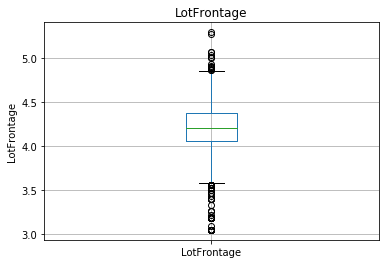

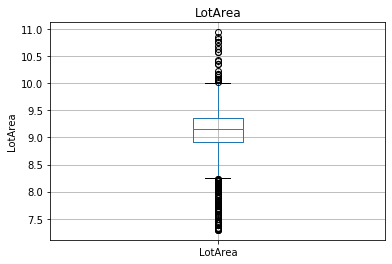

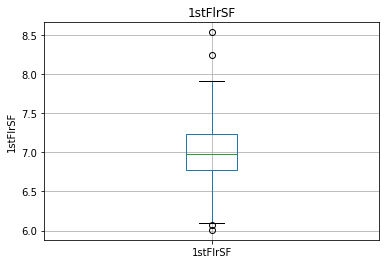

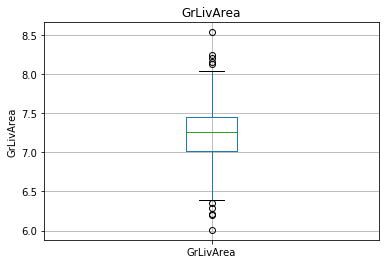

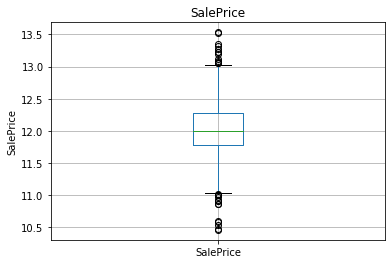

In [195]:
for feature in continous_feature:
    dataset = df.copy()

    if 0 in dataset[feature].unique():
        
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [196]:
#finding out cardinality(categories) of each categoral_feature

for feature in categorical_feature:
    print("The feature name is {} and categories of features are {}".format(feature,len(df[feature].unique())))
print(len(categorical_feature))

The feature name is MSZoning and categories of features are 6
The feature name is Street and categories of features are 2
The feature name is Alley and categories of features are 3
The feature name is LotShape and categories of features are 4
The feature name is LandContour and categories of features are 4
The feature name is Utilities and categories of features are 2
The feature name is LotConfig and categories of features are 5
The feature name is LandSlope and categories of features are 3
The feature name is Neighborhood and categories of features are 25
The feature name is Condition1 and categories of features are 9
The feature name is Condition2 and categories of features are 5
The feature name is BldgType and categories of features are 5
The feature name is HouseStyle and categories of features are 7
The feature name is RoofStyle and categories of features are 6
The feature name is RoofMatl and categories of features are 4
The feature name is Exterior1st and categories of feature

In [197]:
# nan missing values
nan_categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O' and df[feature].isnull().sum()>1]


for feature in nan_categorical_features:
    print("Feature is {} having total {} missing values".format(feature,np.round(df[feature].isnull().mean(),4)))
print(len(nan_categorical_features))

Feature is MSZoning having total 0.0027 missing values
Feature is Alley having total 0.9267 missing values
Feature is Utilities having total 0.0014 missing values
Feature is MasVnrType having total 0.011 missing values
Feature is BsmtQual having total 0.0302 missing values
Feature is BsmtCond having total 0.0308 missing values
Feature is BsmtExposure having total 0.0302 missing values
Feature is BsmtFinType1 having total 0.0288 missing values
Feature is BsmtFinType2 having total 0.0288 missing values
Feature is Functional having total 0.0014 missing values
Feature is FireplaceQu having total 0.5003 missing values
Feature is GarageType having total 0.0521 missing values
Feature is GarageFinish having total 0.0535 missing values
Feature is GarageQual having total 0.0535 missing values
Feature is GarageCond having total 0.0535 missing values
Feature is PoolQC having total 0.9979 missing values
Feature is Fence having total 0.8012 missing values
Feature is MiscFeature having total 0.965 mi

In [198]:
df[nan_categorical_features].isnull().sum()

MSZoning           4
Alley           1352
Utilities          2
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [199]:
def replace_cat_nan(dataset,nan_features):
    dataset = df.copy()
    df[nan_features] = df[nan_features].fillna('missing')
    
replace_cat_nan(df,nan_categorical_features)

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [200]:
df[nan_categorical_features].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [201]:
# %of  missing numerical features
nan_numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O' and df[feature].isnull().sum()>1]
for feature in nan_numerical_feature:
    print("Feature {} has {}% of missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Feature LotFrontage has 0.1556% of missing values
Feature MasVnrArea has 0.0103% of missing values
Feature BsmtFullBath has 0.0014% of missing values
Feature BsmtHalfBath has 0.0014% of missing values
Feature GarageYrBlt has 0.0535% of missing values


In [202]:
for feature in nan_numerical_feature:
    median_value = df[feature].median()
    
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [203]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461.0,20.0,RH,80.0,11622.0,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,missing,MnPrv,missing,0.0,6.0,2010.0,WD,Normal,208500,0,0,0,0,0
1,1462.0,20.0,RL,81.0,14267.0,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1958.0,1958.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,missing,missing,Gar2,12500.0,6.0,2010.0,WD,Normal,181500,0,0,0,0,0
2,1463.0,60.0,RL,74.0,13830.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,missing,MnPrv,missing,0.0,3.0,2010.0,WD,Normal,223500,0,0,0,0,0
3,1464.0,60.0,RL,78.0,9978.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,1998.0,1998.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,6.0,2010.0,WD,Normal,140000,0,0,0,0,0
4,1465.0,120.0,RL,43.0,5005.0,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,1992.0,1992.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,missing,missing,missing,0.0,1.0,2010.0,WD,Normal,250000,0,0,0,0,0
5,1466.0,60.0,RL,75.0,10000.0,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,1993.0,1994.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763.0,892.0,0.0,1655.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157.0,84.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,4.0,2010.0,WD,Normal,143000,0,0,0,0,0
6,1467.0,20.0,RL,67.0,7980.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6.0,7.0,1992.0,2007.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187.0,0.0,0.0,1187.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,missing,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483.0,21.0,0.0,0.0,0.0,0.0,missing,GdPrv,Shed,500.0,3.0,2010.0,WD,Normal,307000,1,0,0,0,0
7,1468.0,60.0,RL,63.0,8402.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,

In [204]:
df['LotFrontage'].median()

67.0

In [205]:
# handling temporary(datetime variables)

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [206]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461.0,20.0,RH,80.0,11622.0,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,49.0,49.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,missing,MnPrv,missing,0.0,6.0,2010.0,WD,Normal,208500,0,0,0,0,0
1,1462.0,20.0,RL,81.0,14267.0,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,52.0,52.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,missing,missing,Gar2,12500.0,6.0,2010.0,WD,Normal,181500,0,0,0,0,0
2,1463.0,60.0,RL,74.0,13830.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,13.0,12.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,missing,MnPrv,missing,0.0,3.0,2010.0,WD,Normal,223500,0,0,0,0,0
3,1464.0,60.0,RL,78.0,9978.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,12.0,12.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,6.0,2010.0,WD,Normal,140000,0,0,0,0,0
4,1465.0,120.0,RL,43.0,5005.0,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,18.0,18.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,missing,missing,missing,0.0,1.0,2010.0,WD,Normal,250000,0,0,0,0,0
5,1466.0,60.0,RL,75.0,10000.0,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,17.0,16.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763.0,892.0,0.0,1655.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157.0,84.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,4.0,2010.0,WD,Normal,143000,0,0,0,0,0
6,1467.0,20.0,RL,67.0,7980.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6.0,7.0,18.0,3.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187.0,0.0,0.0,1187.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,missing,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483.0,21.0,0.0,0.0,0.0,0.0,missing,GdPrv,Shed,500.0,3.0,2010.0,WD,Normal,307000,1,0,0,0,0
7,1468.0,60.0,RL,63.0,8402.0,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,12.0,12.0,Gable,CompShg,VinylSd,VinylSd

In [207]:
import numpy as np
features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in features:
    df[feature] = np.log(df[feature])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [208]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461.0,20.0,RH,4.382027,9.360655,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,49.0,49.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0.0,0.0,6.797940,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,missing,MnPrv,missing,0.0,6.0,2010.0,WD,Normal,12.247694,0,0,0,0,0
1,1462.0,20.0,RL,4.394449,9.565704,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,52.0,52.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0.0,0.0,7.192182,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,missing,missing,Gar2,12500.0,6.0,2010.0,WD,Normal,12.109011,0,0,0,0,0
2,1463.0,60.0,RL,4.304065,9.534595,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,13.0,12.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701.0,0.0,7.395722,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,missing,MnPrv,missing,0.0,3.0,2010.0,WD,Normal,12.317167,0,0,0,0,0
3,1464.0,60.0,RL,4.356709,9.208138,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,12.0,12.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678.0,0.0,7.380256,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,6.0,2010.0,WD,Normal,11.849398,0,0,0,0,0
4,1465.0,120.0,RL,3.761200,8.518193,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,18.0,18.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0.0,0.0,7.154615,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,missing,missing,missing,0.0,1.0,2010.0,WD,Normal,12.429216,0,0,0,0,0
5,1466.0,60.0,RL,4.317488,9.210340,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,17.0,16.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892.0,0.0,7.411556,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157.0,84.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,4.0,2010.0,WD,Normal,11.870600,0,0,0,0,0
6,1467.0,20.0,RL,4.204693,8.984694,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6.0,7.0,18.0,3.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0.0,0.0,7.079184,1.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,missing,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483.0,21.0,0.0,0.0,0.0,0.0,missing,GdPrv,Shed,500.0,3.0,2010.0,WD,Normal,12.634603,1,0,0,0,0
7,1468.0,60.0,RL,4.143135,9.036225,Pave,missing,IR1,L

In [209]:
#Handling rare Categorical features by labelling it as rare_var if it is 1% w.r.t to whole dataset
for feature in categorical_feature:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'rare_var')


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [210]:
df.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461.0,20.0,rare_var,4.382027,9.360655,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,49.0,49.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0.0,0.0,6.797940,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,missing,MnPrv,missing,0.0,6.0,2010.0,WD,Normal,12.247694,0,0,0,0,0
1,1462.0,20.0,RL,4.394449,9.565704,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,52.0,52.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0.0,0.0,7.192182,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,missing,missing,rare_var,12500.0,6.0,2010.0,WD,Normal,12.109011,0,0,0,0,0
2,1463.0,60.0,RL,4.304065,9.534595,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,13.0,12.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701.0,0.0,7.395722,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,missing,MnPrv,missing,0.0,3.0,2010.0,WD,Normal,12.317167,0,0,0,0,0
3,1464.0,60.0,RL,4.356709,9.208138,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,12.0,12.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678.0,0.0,7.380256,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,6.0,2010.0,WD,Normal,11.849398,0,0,0,0,0
4,1465.0,120.0,RL,3.761200,8.518193,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,18.0,18.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0.0,0.0,7.154615,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,missing,missing,missing,0.0,1.0,2010.0,WD,Normal,12.429216,0,0,0,0,0
5,1466.0,60.0,RL,4.317488,9.210340,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,17.0,16.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892.0,0.0,7.411556,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157.0,84.0,0.0,0.0,0.0,0.0,missing,missing,missing,0.0,4.0,2010.0,WD,Normal,11.870600,0,0,0,0,0
6,1467.0,20.0,RL,4.204693,8.984694,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6.0,7.0,18.0,3.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0.0,0.0,7.079184,1.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,0.0,missing,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483.0,21.0,0.0,0.0,0.0,0.0,missing,GdPrv,Shed,500.0,3.0,2010.0,WD,Normal,12.634603,1,0,0,0,0
7,1468.0,60.0,RL,4.143135,9.036225,Pave,mis

In [211]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(categorical_feature)
print(len(categorical_feature))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [212]:
for feature in categorical_feature:
    labels_ordered=df.groupby(feature)['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [213]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461.0,20.0,4,4.382027,9.360655,0,1,0,3,1,1,1,16,3,0,0,3,5.0,6.0,49.0,49.0,0,0,5,4,2,0.0,3,2,2,4,2,0,4,468.0,5,144.0,270.0,882.0,1,1,1,2,6.797940,0.0,0.0,6.797940,0.0,0.0,1.0,0.0,2.0,1.0,1,5.0,3,0.0,1,3,49.0,2,1.0,730.0,2,3,2,140.0,0.0,0.0,0.0,120.0,0.0,1,2,1,0.0,6.0,2010.0,2,2,12.247694,0,0,0,0,0
1,1462.0,20.0,3,4.394449,9.565704,0,1,1,3,1,2,1,16,2,0,0,3,6.0,6.0,52.0,52.0,1,0,6,5,1,108.0,3,2,2,4,2,0,5,923.0,4,0.0,406.0,1329.0,1,1,1,2,7.192182,0.0,0.0,7.192182,0.0,0.0,1.0,1.0,3.0,1.0,2,6.0,3,0.0,1,3,52.0,2,1.0,312.0,2,3,2,393.0,36.0,0.0,0.0,0.0,0.0,1,1,0,12500.0,6.0,2010.0,2,2,12.109011,0,0,0,0,0
2,1463.0,60.0,3,4.304065,9.534595,0,1,1,3,1,1,1,19,2,0,0,2,5.0,5.0,13.0,12.0,0,0,5,4,2,0.0,3,2,3,2,2,0,2,791.0,4,0.0,137.0,928.0,1,4,1,2,6.833032,701.0,0.0,7.395722,0.0,0.0,2.0,1.0,3.0,1.0,1,6.0,3,1.0,5,3,13.0,1,2.0,482.0,2,3,2,212.0,34.0,0.0,0.0,0.0,0.0,1,2,1,0.0,3.0,2010.0,2,2,12.317167,0,0,0,0,0
3,1464.0,60.0,3,4.356709,9.208138,0,1,1,3,1,1,1,19,2,0,0,2,6.0,6.0,12.0,12.0,0,0,5,4,1,20.0,3,2,3,4,2,0,2,602.0,4,0.0,324.0,926.0,1,3,1,2,6.830874,678.0,0.0,7.380256,0.0,0.0,2.0,1.0,3.0,1.0,2,7.0,3,1.0,2,3,12.0,1,2.0,470.0,2,3,2,360.0,36.0,0.0,0.0,0.0,0.0,1,1,1,0.0,6.0,2010.0,2,2,11.849398,0,0,0,0,0
4,1465.0,120.0,3,3.761200,8.518193,0,1,1,2,1,1,1,20,2,0,2,3,8.0,5.0,18.0,18.0,0,0,9,8,2,0.0,0,2,3,2,2,0,5,263.0,4,0.0,1017.0,1280.0,1,3,1,2,7.154615,0.0,0.0,7.154615,0.0,0.0,2.0,0.0,2.0,1.0,2,5.0,3,0.0,1,3,18.0,3,2.0,506.0,2,3,2,0.0,82.0,0.0,0.0,144.0,0.0,1,1,1,0.0,1.0,2010.0,2,2,12.429216,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,0,3.044522,7.568379,0,1,0,3,1,1,1,0,2,0,1,2,4.0,7.0,36.0,36.0,0,0,2,3,2,0.0,3,2,2,4,2,0,3,0.0,4,0.0,546.0,546.0,1,4,1,2,6.302619,546.0,0.0,6.995766,0.0,0.0,1.0,1.0,3.0,1.0,1,5.0,3,0.0,1,2,27.0,0,0.0,0.0,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0.0,6.0,2006.0,2,2,12.128111,0,0,0,0,1
1455,2916.0,160.0,0,3.044522,7.546446,0,1,0,3,1,1,1,0,2,0,2,2,4.0,5.0,36.0,36.0,0,0,2,3,2,0.0,3,2,2,4,2,0,4,252.0,4,0.0,294.0,546.0,1,1,1,2,6.302619,546.0,0.0,6.995766,0.0,0.0,1.0,1.0,3.0,1.0,1,6.0,3,0.0,1,5,36.0,2,1.0,286.0,2,3,2,0.0,24.0,0.0,0.0,0.0,0.0,1,1,1,0.0,4.0,2006.0,2,0,12.072541,0,0,0,0,0
1456,2917.0,20.0,3,5.075174,9.903488,0,1,0,3,1,1,1,17,2,0,0,3,5.0,7.0,46.0,10.0,0,0,5,4,2,0.0,3,2,2,4,2,0,5,1224.0,4,0.0,0.0,1224.0,1,3,1,2,7.109879,0.0,0.0,7.109879,1.0,0.0,1.0,0.0,4.0,1.0,1,7.0,3,1.0,5,1,46.0,2,2.0,576.0,2,3,2,474.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0.0,9.0,2006.0,2,0,12.254863,0,0,0,0,0
1457,2918.0,85.0,3,4.127134,9.253496,0,1,0,3,1,1,1,17,2,0,0,1,5.0,5.0,14.0,14.0,0,0,9,2,2,0.0,3,2,3,2,2,4,2,337.0,4,0.0,575.0,912.0,1,1,1,2,6.877296,0.0,0.0,6.877296,0.0,1.0,1.0,0.0,3.0,1.0,1,6.0,3,0.0,1,2,27.0,0,0.0,0.0,1,2,2,80.0,32.0,0.0,0.0,0.0,0.0,1,2,2,700.0,7.0,2006.0,2,2,12.493130,0,0,0,0,1


In [214]:
#features to be taken for performing feature Scaling
feature_scaler = [feature for feature in df.columns if feature not in ['Id','SalePrice']]
print(len(feature_scaler))
df[feature_scaler]


84


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,20.0,4,4.382027,9.360655,0,1,0,3,1,1,1,16,3,0,0,3,5.0,6.0,49.0,49.0,0,0,5,4,2,0.0,3,2,2,4,2,0,4,468.0,5,144.0,270.0,882.0,1,1,1,2,6.797940,0.0,0.0,6.797940,0.0,0.0,1.0,0.0,2.0,1.0,1,5.0,3,0.0,1,3,49.0,2,1.0,730.0,2,3,2,140.0,0.0,0.0,0.0,120.0,0.0,1,2,1,0.0,6.0,2010.0,2,2,0,0,0,0,0
1,20.0,3,4.394449,9.565704,0,1,1,3,1,2,1,16,2,0,0,3,6.0,6.0,52.0,52.0,1,0,6,5,1,108.0,3,2,2,4,2,0,5,923.0,4,0.0,406.0,1329.0,1,1,1,2,7.192182,0.0,0.0,7.192182,0.0,0.0,1.0,1.0,3.0,1.0,2,6.0,3,0.0,1,3,52.0,2,1.0,312.0,2,3,2,393.0,36.0,0.0,0.0,0.0,0.0,1,1,0,12500.0,6.0,2010.0,2,2,0,0,0,0,0
2,60.0,3,4.304065,9.534595,0,1,1,3,1,1,1,19,2,0,0,2,5.0,5.0,13.0,12.0,0,0,5,4,2,0.0,3,2,3,2,2,0,2,791.0,4,0.0,137.0,928.0,1,4,1,2,6.833032,701.0,0.0,7.395722,0.0,0.0,2.0,1.0,3.0,1.0,1,6.0,3,1.0,5,3,13.0,1,2.0,482.0,2,3,2,212.0,34.0,0.0,0.0,0.0,0.0,1,2,1,0.0,3.0,2010.0,2,2,0,0,0,0,0
3,60.0,3,4.356709,9.208138,0,1,1,3,1,1,1,19,2,0,0,2,6.0,6.0,12.0,12.0,0,0,5,4,1,20.0,3,2,3,4,2,0,2,602.0,4,0.0,324.0,926.0,1,3,1,2,6.830874,678.0,0.0,7.380256,0.0,0.0,2.0,1.0,3.0,1.0,2,7.0,3,1.0,2,3,12.0,1,2.0,470.0,2,3,2,360.0,36.0,0.0,0.0,0.0,0.0,1,1,1,0.0,6.0,2010.0,2,2,0,0,0,0,0
4,120.0,3,3.761200,8.518193,0,1,1,2,1,1,1,20,2,0,2,3,8.0,5.0,18.0,18.0,0,0,9,8,2,0.0,0,2,3,2,2,0,5,263.0,4,0.0,1017.0,1280.0,1,3,1,2,7.154615,0.0,0.0,7.154615,0.0,0.0,2.0,0.0,2.0,1.0,2,5.0,3,0.0,1,3,18.0,3,2.0,506.0,2,3,2,0.0,82.0,0.0,0.0,144.0,0.0,1,1,1,0.0,1.0,2010.0,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,0,3.044522,7.568379,0,1,0,3,1,1,1,0,2,0,1,2,4.0,7.0,36.0,36.0,0,0,2,3,2,0.0,3,2,2,4,2,0,3,0.0,4,0.0,546.0,546.0,1,4,1,2,6.302619,546.0,0.0,6.995766,0.0,0.0,1.0,1.0,3.0,1.0,1,5.0,3,0.0,1,2,27.0,0,0.0,0.0,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0.0,6.0,2006.0,2,2,0,0,0,0,1
1455,160.0,0,3.044522,7.546446,0,1,0,3,1,1,1,0,2,0,2,2,4.0,5.0,36.0,36.0,0,0,2,3,2,0.0,3,2,2,4,2,0,4,252.0,4,0.0,294.0,546.0,1,1,1,2,6.302619,546.0,0.0,6.995766,0.0,0.0,1.0,1.0,3.0,1.0,1,6.0,3,0.0,1,5,36.0,2,1.0,286.0,2,3,2,0.0,24.0,0.0,0.0,0.0,0.0,1,1,1,0.0,4.0,2006.0,2,0,0,0,0,0,0
1456,20.0,3,5.075174,9.903488,0,1,0,3,1,1,1,17,2,0,0,3,5.0,7.0,46.0,10.0,0,0,5,4,2,0.0,3,2,2,4,2,0,5,1224.0,4,0.0,0.0,1224.0,1,3,1,2,7.109879,0.0,0.0,7.109879,1.0,0.0,1.0,0.0,4.0,1.0,1,7.0,3,1.0,5,1,46.0,2,2.0,576.0,2,3,2,474.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0.0,9.0,2006.0,2,0,0,0,0,0,0
1457,85.0,3,4.127134,9.253496,0,1,0,3,1,1,1,17,2,0,0,1,5.0,5.0,14.0,14.0,0,0,9,2,2,0.0,3,2,3,2,2,4,2,337.0,4,0.0,575.0,912.0,1,1,1,2,6.877296,0.0,0.0,6.877296,0.0,1.0,1.0,0.0,3.0,1.0,1,6.0,3,0.0,1,2,27.0,0,0.0,0.0,1,2,2,80.0,32.0,0.0,0.0,0.0,0.0,1,2,2,700.0,7.0,2006.0,2,2,0,0,0,0,1


In [215]:
#using minmax scaler, avoiding using standardscaler because it will make dataset align with standard normal distribution

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[feature_scaler])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [216]:
scaler.transform(df[feature_scaler])


array([[0.        , 1.        , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.75      , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.75      , 0.48035069, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.75      , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [217]:
test = pd.concat([df[['Id','SalePrice']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(df[feature_scaler]),
                   columns = feature_scaler)]
                    ,axis=1)

In [218]:
test.head(10)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461.0,12.247694,0.000000,1.00,0.593445,0.566360,0.0,0.5,0.000000,1.000000,1.0,0.25,0.5,0.80,0.500000,0.0,0.0,0.6,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.5,0.363636,0.50,0.000000,1.0,0.666667,0.50,1.0,0.5,0.00,0.666667,0.116708,0.833333,0.094364,0.126168,0.173111,1.0,0.25,1.0,0.666667,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.25,0.166667,0.75,0.00,0.2,0.5,0.792994,0.666667,0.2,0.490591,0.666667,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.50,0.5,0.000000,0.454545,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
1,1462.0,12.109011,0.000000,0.75,0.598957,0.622527,0.0,0.5,0.333333,1.000000,1.0,0.50,0.5,0.80,0.333333,0.0,0.0,0.6,0.555556,0.625,0.407692,0.870968,0.5,0.0,0.6,0.454545,0.25,0.083721,1.0,0.666667,0.50,1.0,0.5,0.00,0.833333,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,1.0,0.666667,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.75,0.00,0.2,0.5,0.802548,0.666667,0.2,0.209677,0.666667,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.25,0.0,0.735294,0.454545,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,1463.0,12.317167,0.235294,0.75,0.558854,0.614005,0.0,0.5,0.333333,1.000000,1.0,0.25,0.5,0.95,0.333333,0.0,0.0,0.4,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.5,0.363636,0.50,0.000000,1.0,0.666667,0.75,0.5,0.5,0.00,0.333333,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,1.00,1.0,0.666667,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.25,0.250000,0.75,0.25,1.0,0.5,0.678344,0.333333,0.4,0.323925,0.666667,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.50,0.5,0.000000,0.181818,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
3,1464.0,11.849398,0.235294,0.75,0.582212,0.524583,0.0,0.5,0.333333,1.000000,1.0,0.25,0.5,0.95,0.333333,0.0,0.0,0.4,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.5,0.363636,0.25,0.015504,1.0,0.666667,0.75,1.0,0.5,0.00,0.333333,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.75,1.0,0.666667,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.75,0.25,0.4,0.5,0.675159,0.333333,0.4,0.315860,0.666667,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.25,0.5,0.000000,0.454545,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
4,1465.0,12.429216,0.588235,0.75,0.317987,0.335596,0.0,0.5,0.333333,0.666667,1.0,0.25,0.5,1.00,0.333333,0.0,0.5,0.6,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.9,0.727273,0.50,0.000000,0.0,0.666667,0.75,0.5,0.5,0.00,0.833333,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.75,1.0,0.666667,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.75,0.00,0.2,0.5,0.694268,1.000000,0.4,0.340054,0.666667,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.25,0.5,0.000000,0.000000,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
5,1466.0,11.870600,0.235294,0.75,0.564810,0.525186,0.0,0.5,0.333333,1.000000,1.0,0.50,0.5,0.95,0.333333,0.0,0.0,0.4,0.555556,0.500,0.138462,0.290323,0.0,0.0,0.9,0.727273,0.50,0.000000,1.0,0.666667,0.75,0.5,0.5,0.00,0.500000,0.000000,0.666667,0.000000,0.356542,0.149755,1.0,1.00,1.0,0.666667,0.248672,0.479055,0.0,0.555058,0.000000,0.0,0.50,0.5,0.500000,0.5,0.25,0.333333,0.

In [219]:
test.to_csv('test.csv',index=False)